In [1]:
from keras import backend as K
import time
import matplotlib.pyplot as plt
import numpy as np
% matplotlib inline
np.random.seed(2017) 
from keras.models import Sequential
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.layers import Activation, Flatten, Dense, Dropout
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils

Using TensorFlow backend.


In [2]:
from keras.datasets import cifar10
(train_features, train_labels), (test_features, test_labels) = cifar10.load_data()
num_train, img_channels, img_rows, img_cols =  train_features.shape
num_test, _, _, _ =  test_features.shape
num_classes = len(np.unique(train_labels))

170500096/170498071 [==============================] - 2s 0us/step


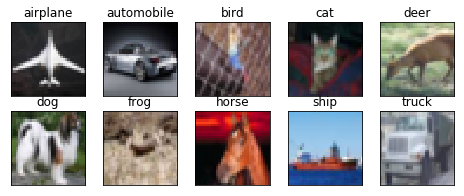

In [3]:
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']
fig = plt.figure(figsize=(8,3))
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = np.where(train_labels[:]==i)[0]
    features_idx = train_features[idx,::]
    img_num = np.random.randint(features_idx.shape[0])
    im = features_idx[img_num]
    ax.set_title(class_names[i])
    plt.imshow(im)
plt.show()

In [0]:
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['acc'])+1),model_history.history['acc'])
    axs[0].plot(range(1,len(model_history.history['val_acc'])+1),model_history.history['val_acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['acc'])+1),len(model_history.history['acc'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

In [0]:
def accuracy(test_x, test_y, model):
    result = model.predict(test_x)
    predicted_class = np.argmax(result, axis=1)
    true_class = np.argmax(test_y, axis=1)
    num_correct = np.sum(predicted_class == true_class) 
    accuracy = float(num_correct)/result.shape[0]
    return (accuracy * 100)

In [0]:
train_features = train_features.astype('float32')/255
test_features = test_features.astype('float32')/255
# convert class labels to binary class labels
train_labels = np_utils.to_categorical(train_labels, num_classes)
test_labels = np_utils.to_categorical(test_labels, num_classes)

In [7]:
from keras.layers import Input
from keras.models import Model
from keras.layers import DepthwiseConv2D
from keras.layers import SeparableConv2D
from keras.layers import concatenate


inputs = Input(shape=(32,32,3)) #32*32*3


l1 = Convolution2D(32,(3,3),padding='same',activation='relu')(inputs) #32*32*32
l2 = Convolution2D(48,(3,3),padding='same',activation='relu')(l1) #32*32*48
l3 = Convolution2D(64,(3,3),padding='same',activation='relu')(l2) #32*32*64

#Spatially Separable Convolution  
spatial_s1 = Convolution2D(32,(3,1),padding='same',activation='relu')(l3) #32*32*32
spatial_s2 = Convolution2D(32,(1,3),padding='same',activation='relu')(spatial_s1) #32*32*32

#Depthwise Separable Convolution
depth_wise = SeparableConv2D(64, (3, 3), padding='same', use_bias=False)(spatial_s2) #32*32*64

max1 = MaxPooling2D(pool_size=(2,2))(depth_wise) #16*16

#Grouped Convolution (3*3, 5*5)
l4 = Convolution2D(32,(3,3),padding='same',activation='relu')(max1) #16*16*32
l5 = Convolution2D(32,(5,5),padding='same',activation='relu')(l4) #16*16*32
con1 = concatenate([l4, l5])

l6 = Convolution2D(48,(1,1),activation='relu', name='11111111')(con1) #16*16*32
max2 = MaxPooling2D(pool_size=(2,2))(l6) #16*16


#Grouped Convolution (3*3 with dialation-1, dialation-2)
l7 = Convolution2D(32,(3,3),padding='same',activation='relu')(max2) #8*8*32
l8 = Convolution2D(48,(3,3),padding='same',activation='relu',dilation_rate=1)(l7) #8*8*48
l9 = Convolution2D(48,(3,3),padding='same',activation='relu',dilation_rate=2)(l7) #8*8*48

con2 = concatenate([l8, l9])

l10 = Convolution2D(10,(8,8),activation='softmax')(con2)
l11 = Convolution2D(10,(1,1),)(l10) #8*8*48
predictions = Flatten()(l10)

model = Model(inputs=inputs, outputs=predictions)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

  

W0622 15:57:30.369641 139796589373312 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0622 15:57:30.402689 139796589373312 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0622 15:57:30.409092 139796589373312 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0622 15:57:30.494071 139796589373312 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0622 15:57:30.611794 139796589373312 deprecation_wrapp

In [8]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 32, 32, 3)    0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 32, 32, 32)   896         input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_2 (Conv2D)               (None, 32, 32, 48)   13872       conv2d_1[0][0]                   
__________________________________________________________________________________________________
conv2d_3 (Conv2D)               (None, 32, 32, 64)   27712       conv2d_2[0][0]                   
__________________________________________________________________________________________________
conv2d_4 (

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., callbacks=[<keras.ca..., verbose=1, steps_per_epoch=390, epochs=50)`
  from ipykernel import kernelapp as app
W0622 15:57:30.877565 139796589373312 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (f

Epoch 1/50
390/390 [==============================] - 19s 49ms/step - loss: 1.7306 - acc: 0.3655 - val_loss: 1.3775 - val_acc: 0.5076
Epoch 2/50
390/390 [==============================] - 13s 33ms/step - loss: 1.2133 - acc: 0.5656 - val_loss: 1.1178 - val_acc: 0.6018
Epoch 3/50
390/390 [==============================] - 13s 33ms/step - loss: 0.9898 - acc: 0.6499 - val_loss: 0.9879 - val_acc: 0.6482
Epoch 4/50
390/390 [==============================] - 13s 33ms/step - loss: 0.8538 - acc: 0.6998 - val_loss: 0.9139 - val_acc: 0.6777
Epoch 5/50
390/390 [==============================] - 13s 33ms/step - loss: 0.7509 - acc: 0.7356 - val_loss: 0.9432 - val_acc: 0.6721
Epoch 6/50
390/390 [==============================] - 13s 32ms/step - loss: 0.6595 - acc: 0.7684 - val_loss: 0.9107 - val_acc: 0.6901
Epoch 7/50
390/390 [==============================] - 13s 32ms/step - loss: 0.5832 - acc: 0.7967 - val_loss: 0.9228 - val_acc: 0.6931
Epoch 8/50
390/390 [==============================] - 13s 32ms

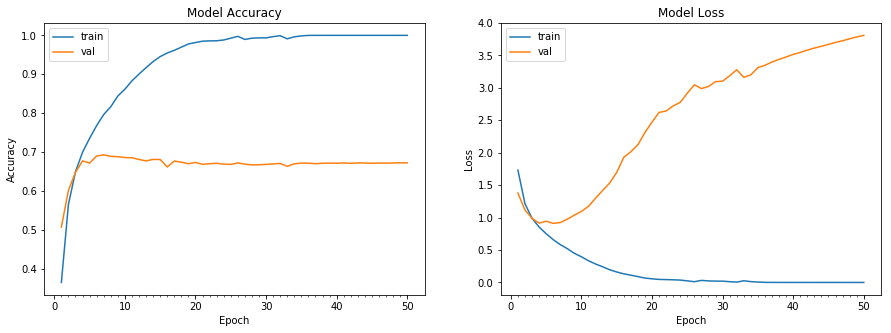

Accuracy on test data is: 67.24


In [9]:
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import LearningRateScheduler


datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=False)

def scheduler(epoch, lr):
  return round(0.003 * 1/(1 + 0.25* epoch), 10)

# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),samples_per_epoch = train_features.shape[0], nb_epoch = 50, 
                                 validation_data = (test_features, test_labels),callbacks=[LearningRateScheduler(scheduler)], verbose=1)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))

